# POE user analyzing project
###### **Data reference and questions are here: https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic**

---
Hi, I'm Angela. 😊 I'm a novice in data analysis.  I'm a novice in data analysis. I'm interested in the video games, mobility, culture, and content industry. I hope to become a data scientist with anomaly detection and anti-cheating. I hope that my analysis will have a positive impact on the world at least a little bit.  

This is my first Kaggle-data analyzing project on my own. I played(?) with this data for almost a month or more freely, and I finish it to start to answer these questions partially. Finally, I can close the analysis joyfully.
I analyzed this data set with my thoughts and what I learned (as if I were a game analyst 😆).  
_ps. English may seem a little awkward because it is not my first language. I'm sorry. And I used the word 'average' more than the word 'mean' because I wanted to communicate more clearly in my hectic writing. 'mean' is so mean to 'average', 'mean' means 'mean' and... just joking._ 🤪

---
##### **Questions for participants**

1. A total number of players in each division, usage of each class in descending order.
2. Some of the players streaming their game (twitch column). Do they play better than people, who does not?
3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
5. Show dependency between level and class of died characters. Only for HC divisions.


## Importing Data and Libraries
---

In [1]:
import pandas as pd
import numpy as np

import time as time
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn as sk
# import tensorflow as tf
# import keras

np.random.seed(0)
# tf.random.set_seed(0)

# version check
print(sns.__version__)
print(pd.__version__)
print(np.__version__)
# print(sk.__version__)
# print(tf.__version__)
# print(keras.__version__)

data = pd.read_csv("poe_stats.csv")

0.11.2
1.5.3
1.22.4


In [2]:
df = data
df.head(10)

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger
5,2,False,False,SteelStreamerAdvantage,100,Deadeye,51acb8e6fac3cfaa7ff848151dad01b0a6f350e7525543...,4250334444,Steelmage,37,steelmage202,Hardcore Harbinger
6,2,False,False,Grom_WhyGodThreeCmWhy,100,Gladiator,5d8b80b2bdd30f3dba1036a6791187562758935e8d4723...,4250334444,rocklegend,22,gromick,SSF Harbinger HC
7,2,False,False,beobio_capitan,100,Inquisitor,65c58f9b186e1fbe9f927484f3f178cdb9ee0dc2427289...,4250334444,TishaVosemsot,40,beobio,SSF Harbinger
8,3,False,False,Rami_The_Negromaniac,100,Necromancer,00c0030fc548cc4c0d804564f8fb356610044b7e6d484f...,4250334444,rami1337,40,rami1337,Harbinger
9,3,False,False,FutonBlewAway,100,Raider,46e56572ff6e403f45fac597240e13e9af225f06ca4e52...,4250334444,pleaGRC,40,NaN,SSF Harbinger


## Data summary

In [3]:
# options about float

pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,rank,level,experience,challenges
count,"59,776.00","59,776.00","59,776.00","59,776.00"
mean,"7,495.37",85.42,"1,825,786,027.36",25.76
std,"4,330.18",11.29,"1,094,747,934.61",8.44
min,1.00,53.00,"77,909,816.00",4.00
25%,"3,745.00",78.00,"777,469,746.25",19.00
50%,"7,492.00",90.00,"1,934,009,687.00",25.00
75%,"11,247.00",95.00,"2,876,116,901.00",33.00
max,"15,000.00",100.00,"4,250,334,444.00",40.00


In [4]:
df.describe(include = 'object')

,name,class,id,account,twitch,ladder
count,59776,59776,59776,59776,16300,59776
unique,58286,26,59776,37123,9613,4
top,_Flic_,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,chuz101,thespunkylobster,SSF Harbinger
freq,14,8711,1,30,18,14981


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59776 entries, 0 to 59775
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        59776 non-null  int64 
 1   dead        59776 non-null  bool  
 2   online      59776 non-null  bool  
 3   name        59776 non-null  object
 4   level       59776 non-null  int64 
 5   class       59776 non-null  object
 6   id          59776 non-null  object
 7   experience  59776 non-null  int64 
 8   account     59776 non-null  object
 9   challenges  59776 non-null  int64 
 10  twitch      16300 non-null  object
 11  ladder      59776 non-null  object
dtypes: bool(2), int64(4), object(6)
memory usage: 4.7+ MB


# 3. A case when we were Necromancer
---
##### Q3. Predict the chance to be in the top 30 in each division, if we are Necromancer. With and without stream.

I don't know exactly what 'stream' means, but I think it would be twitch streaming. So, I define it as all Necromancer characters and Necromancer characters with twitch streaming.
In this case, I could think of the question like these... 🤔

> 1. simply get a percentage of Necromancer in the top 30 by ladder (And multiply the probability of getting in the top 30 ranks)  
2. get a percentage of Necromancer IDs in the top 30 among all Necromancers (And divide it by the sum of the percentage of each class)
3. Bayesian probability: ($Hypothesis = Necromancer, d(evidence) = Top 30$ )
4. make a model with 'rank', 'class', 'ladder', 'twitch' columns, and predict.
> 

---

What do you think? Did you notice? Yes, right. Actually, **method 2 is the same as method 3.**  
This's what you can think. It's the difference between 'choosing a class' or 'viewing the top 30 as a conditional probability after the class is selected'. I think there will be quite a difference in probability, but depending on the person looking at this problem, it will also change what you think is right.

Method 1 is 3-1-1, method 2 and 3 are 3-1-2. Follow me.

#####  Before the analysis(and getting numbers), I should clarify this thing, the meaning of each analysis. This is very important I think.

I thought about these methods partially. Things like what we can do with data, how, and the meaning of it, and the flaws.
I used the word 'hypothesis' sometimes, which means when we use specific methods(values) for solving the problem correctly.
And the critical problem(supposition) is here, we are extremely good at playing POE (especially Necromancer class🤣).

> ##### 3-1-1: **”(number of Necromancers in the top 30 $\div$ number of All classes in the top 30) $\times$ (probability when we are in the top 30 among 15000 ranks)”**  
= **”(number of Necromancers in the top 30** $\div$ **number of all characters)”**  
<br>
In 3-1-1, I got the ratio between classes in the top 30.
This is simply the top 30 class percentage. We can answer what classes are in the top 30. It's very extreme.  
<br>And then, I thought about whether I should multiply the probability of being in the top 30. If you're good enough and you're in the top 15,000, assuming that the ranking is somewhat determined by luck, you might be able to solve it with 30/15000. It's like, we have enough skills to make it to the top 30, so we assume that out of 15,000 characters, the top 30 ranks is decided by luck. (Of course, I think some people think that this number can be multiplied or not multiplied enough to show the probability.)  
<br>That's why the biggest problem with this method is that it presupposes that **the population of POE consists of only 15,000 players**. However, it's not just 15,000 people competing; it's about gathering data from individuals ranked on  the top 15,000, implying a much larger pool of competitors. Ultimately, we must assume that  a considerable level of skill among the players.  
<br>There is another problem with this method: this method allows us to know the best Necromancer percentages except for comparison problems. We're also Necromancer, but Necromancer outside the top 30 is ignored. Numbers outside the top 30 are ignored no matter how many necromancers are out there or other hot classes (Pathfinder, Gladiator, Slayer).
>

> ##### 3-1-2: “(number of Necromancers in the top 30 $\div$ number of All Necromancers)”  = Bayesian Probability  
In 3-1-4, I will try to apply the concept of Bayesian probability. First, we need to recognize that there is a slight difference in nuance. The assumption that we are a Necromancer is not our choice but rather a dimension of interpreting indicators of results that can be obtained from data. This considers numerical differences from other classes. 
<br>Each class has a different number of characters so we can't simply compare like 3-1-1. In this method, it will be considered the 'class selection' problem rather than ‘being in the top 30’.
<br>When we use this one, we need a precondition again; we're so good that we can compete with the top 30 characters, and none of them(all characters) which are not in the top 30 are a match for us. (It means, we can answer how many characters are playing best among all Necromancers.)
<br>The formulas to calculate $P(Top30)$ and $P(out of 30)$ are $30/150000$ and $14970/15000$ (of course $\times 4$ is omitted), respectively. (It was sad yet interesting to attempt such calculations despite the fact that the probability of being in the Top 30 as Necromancer depends on our ability.)  
    $$
    P(H|E) = \frac {P(E|H)P(H)} {P(E)}
    $$
Using this, $H$ represents the hypothesis that Top30 occurred, and $E$ represents the information that we are Necromancer. $P(H)$ is the prior probability, which is the confidence in the probability of being in the top 30, and $P(H|E)$ is the posterior probability, which is the confidence in the probability of being in the top 30 when we are Necromancer. (Although Bayesian probability, unlike empirical probability, refers to 'confidence in a claim, I can refer to it like a traditional probability, so please keep that in mind...)   
    - The formula is as follows:  
    $$
    P(Top30|Nec) = \frac {P(Nec | Top30)\times P(Top30)} {P(Nec)}
    $$  
    - To recapitulate this using this, $P(A|B) = \frac {P(A\bigcap B)} {P(B)}$,  
    $$
    P(Top30|Nec) = \frac {P(Nec | Top30)\times P(Top30)} {P(Nec|Top30)\times P(Top30) + 
    P(Nec|out\space of\space 30)\times P(out\space of\space 30) }
    $$  
    - Then we got a probability of some other classes, and we saw if the odds were high or not.  


##### Before the steps
- check the 'rank' column whether it includes null or not in 30.  
- make a 'stream' dummy column for analysis depending on whether or not.  
- set some conditions for code writing comfort.  

In [6]:
# check the rank number in each ladder whether there is a null or not. 
df[df['rank']<=30].groupby('ladder')['rank'].nunique()

ladder
Harbinger             30
Hardcore Harbinger    30
SSF Harbinger         30
SSF Harbinger HC      30
Name: rank, dtype: int64

In [7]:
# make a twitch column dummy with streaming.
df['stream'] = np.where(df['twitch'].isna(), 0, 1)

In [8]:
# condition list
cond_Nec = (df['class']=='Necromancer')
cond_30 = (df['rank']<=30)
cond_tw = (df['stream']==1)

## 3-1. not caring of stream 
---


### 3-1-1. The Necromancer ratio of Among the top 30 * probability when we are in the top 30

**”(number of Necromancers in the top 30 $\div$ number of All classes in the top 30) $\times$ (probability when we are in the top 30 among 15000 ranks)”** 

This means' the rate of the top 30 Necromancer among 'all characters'.', so it be summarized like this:   

**= ”(number of Necromancers in the top 30 $\div$ number of all characters)”**


Let's see what classes in top 30 and thier rate.

And get the percentage between classes in the top 30 characters.

#### (1) each class ratios in top 30, by ladder

In [9]:
# number in top 30 classes
df[cond_30].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id']

ladder,Harbinger,Hardcore Harbinger,SSF Harbinger,SSF Harbinger HC
class,,,,
Ascendant,0,2,2,0
Berserker,2,1,3,0
Champion,1,2,0,2
Chieftain,0,1,1,1
Deadeye,1,2,0,0
Elementalist,1,0,1,0
Gladiator,1,4,3,3
Guardian,2,1,0,0
Hierophant,0,0,1,0


In [10]:
# classes ratio in top 30 
df[cond_30].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id'] / 30*100

ladder,Harbinger,Hardcore Harbinger,SSF Harbinger,SSF Harbinger HC
class,,,,
Ascendant,0.00,6.67,6.67,0.00
Berserker,6.67,3.33,10.00,0.00
Champion,3.33,6.67,0.00,6.67
Chieftain,0.00,3.33,3.33,3.33
Deadeye,3.33,6.67,0.00,0.00
Elementalist,3.33,0.00,3.33,0.00
Gladiator,3.33,13.33,10.00,10.00
Guardian,6.67,3.33,0.00,0.00
Hierophant,0.00,0.00,3.33,0.00


#### [graph 3-1] visualization to pie chart: class ratios by ladder in the top 30

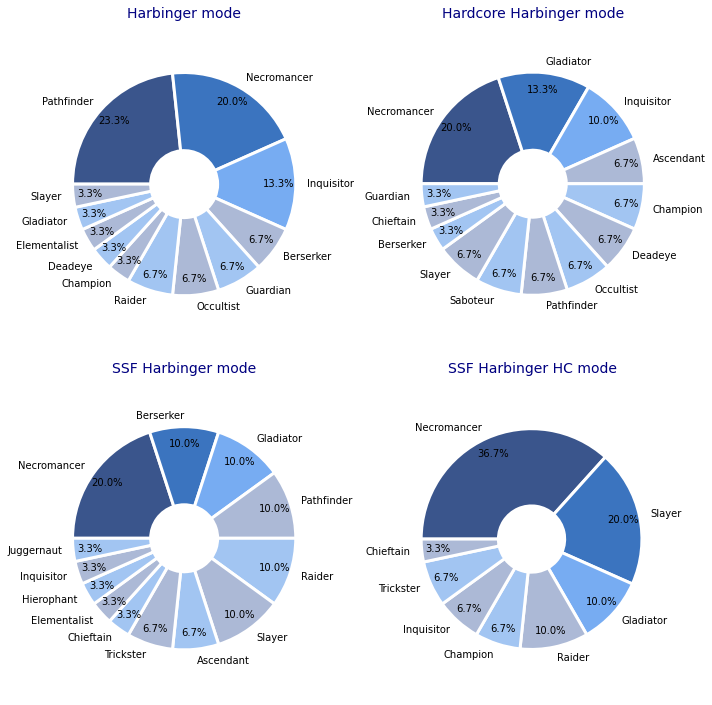

In [11]:
# preparing the data for iteration
df_30pi = df[cond_30].pivot_table(columns='ladder', index='class', aggfunc='count', fill_value=0)['id'] / 30 * 100
df_30pi.reset_index(inplace=True)

# percentage data list making : each ladder
# get values by each column(ladder) which is not a missing value.
modes_data = {
    'Harbinger': df_30pi[df_30pi['Harbinger'] != 0][['class', 'Harbinger']].sort_values('Harbinger', ascending=False),
    'Hardcore Harbinger': df_30pi[df_30pi['Hardcore Harbinger'] != 0][['class', 'Hardcore Harbinger']].sort_values('Hardcore Harbinger', ascending=False),
    'SSF Harbinger': df_30pi[df_30pi['SSF Harbinger'] != 0][['class', 'SSF Harbinger']].sort_values('SSF Harbinger', ascending=False),
    'SSF Harbinger HC': df_30pi[df_30pi['SSF Harbinger HC'] != 0][['class', 'SSF Harbinger HC']].sort_values('SSF Harbinger HC', ascending=False)
    }

# plot parameters
colors = ['#3A558C', '#3B74BF', '#77ACF2'] + ['#ACB9D6', '#A2C5F2'] * 12
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

# setting subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 10), squeeze=True)
# use labels(key) and ratio(values) dictionary to draw plt
for i, (mode_title, mode_data) in enumerate(modes_data.items()):
    ax = axes[i // 2, i % 2] # subplot position
    ax.pie(mode_data[mode_title], labels=mode_data['class'], autopct='%.1f%%', startangle=180, 
           counterclock=False, wedgeprops=wedgeprops, pctdistance=0.85, colors=colors)
    ax.set_title("{} mode".format(mode_title), fontsize=14, color='navy')
    ax.axis('equal')

# setting layout and showing them!
fig.tight_layout()
plt.show()

Necromancers take 20% in the top 30 except SSF Harbinger HC mode.  
In SSF Harbinger HC mode, Necromancers take 36.67% in the top 30. 


#### [graph 3-2] Necromancers rank boxplot by each ladder

Draw a boxplot of the rank of each ladder's Necromancer. It is true that the plot is not appropriate because it is ranked data, but I draw it because it is easy to see which data points have extreme ranks or how much is median.


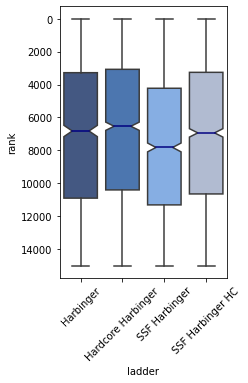

In [12]:
# Necromancers rank boxplot by ladder 
df_Nec = df[cond_Nec]

plt.figure(figsize=(3,5))
plt.xticks(rotation=45, fontsize=10)
sns.boxplot(data = df_Nec.sort_values(by = 'ladder'), x = 'ladder', y = 'rank', 
            palette = colors, notch = True, medianprops = ({'color' : 'Navy'})).invert_yaxis()
plt.show()

#### (2) getting the probability by method 1 

Get the probablity by multiplying the probability to be in the top 30 and the ratio of Necromancers who are in the top 30.(that's why I didn't do 30/15000)  
As you know, each ladder doesn't have an exact number of 15000 IDs. 

In [13]:
# the probability when we go in the top 30 by using broadcasting
each30prob = df[cond_30].groupby(by = 'ladder')['id'].count() \
            / df.groupby(by = 'ladder')['id'].count()

# the ratio of Necromancers who are in the top 30.
eachNec30ratio = df[(cond_30)&(cond_Nec)].groupby(by = 'ladder')['id'].count() \
                / df[cond_30].groupby(by = 'ladder')['id'].count()

pd.set_option('display.float_format', None)
print(each30prob, '\n')
print(eachNec30ratio)

ladder
Harbinger             0.002011
Hardcore Harbinger    0.002013
SSF Harbinger         0.002003
SSF Harbinger HC      0.002004
Name: id, dtype: float64 

ladder
Harbinger             0.200000
Hardcore Harbinger    0.200000
SSF Harbinger         0.200000
SSF Harbinger HC      0.366667
Name: id, dtype: float64


In [14]:
# multiplying
# this is show the probability in percentage(%).
print(each30prob * eachNec30ratio * 100)

ladder
Harbinger             0.040220
Hardcore Harbinger    0.040255
SSF Harbinger         0.040051
SSF Harbinger HC      0.073470
Name: id, dtype: float64


(additional) If we disregard the ladder divisions, it's easy to obtain.

In [15]:
# the probability when we go in the top 30 by using broadcasting
total30prob = df[cond_30]['id'].count() / df['id'].count()

# the ratio of the Necromancers, who are in the top 30 among all Necromancers
Nec30ratio = df[(cond_30)&(cond_Nec)]['id'].count() / 120

# print(total30prob)
# print(Nec30ratio)

### multiplying: the probability values by 100 to represent them as percentages.
print(total30prob * Nec30ratio * 100)

0.0485144539614561


<!-- #### (3) [Answer] method 1 result:  -->
### [Answer with method1: When not considering streaming]
As expected, the numbers are quite low. '0.07 per' is the highest observed.  

    - by ladder
    Harbinger             0.040220
    Hardcore Harbinger    0.040255
    SSF Harbinger         0.040051
    SSF Harbinger HC      0.073470

    - not considered ladder
                          0.048514

### 3-1-2. Rate Among the Necromancers (Bayesian probability)
This logic is based on **Bayesian Probabiltiy**. I expressed it in the formula.

The calculation method is:  
$ P(Top30|Nec) = \frac {P(Nec | Top30)\times P(Top30)} {P(Nec|Top30)\times P(Top30) + 
P(Nec|out\space of\space 30)\times P(out\space of\space 30) } $

- $P(Nec|Top30)$ = Necromancers ratio in top30 (3-1-1.)  

- $P(Top30)$ = 30/15000  
  $P(Out of 30)$ = 14970/15000

#### (1) define datasets with the Necromancers 
Set the necromancer dataset for easy use.

And see the number of Necromancers and top 30 Necromancers by each ladder.

In [16]:
# Don't forget condition list!
# cond_Nec = (df['class']=='Necromancer')
# cond_tw = (df['stream']==1)
# cond_30 = (df['rank']<=30)

# Let's define it separately.
df_Nec = df[cond_Nec]
df_Nec30 = df_Nec[df_Nec['rank']<=30]

In [17]:
# All Necromancers number by ladder
print(df_Nec.groupby('ladder')['id'].count(),"\n")

# Necromancers number Who are in top 30 by ladder
print(df_Nec30.groupby('ladder')['id'].count())

ladder
Harbinger             1207
Hardcore Harbinger    2099
SSF Harbinger         1716
SSF Harbinger HC      2055
Name: id, dtype: int64 

ladder
Harbinger              6
Hardcore Harbinger     6
SSF Harbinger          6
SSF Harbinger HC      11
Name: id, dtype: int64


And check the number of `df_Nec30`. 

In [18]:
# Necromancers Who are in top 30 by ladder, unique users
df_Nec30.groupby(by = 'ladder')[['id', 'rank']].nunique()

,id,rank
ladder,,
Harbinger,6,6
Hardcore Harbinger,6,6
SSF Harbinger,6,6
SSF Harbinger HC,11,11


#### (2) getting the probability by method 2: percentage of the top 30 Necromancer among 'the all Necromancers'

Let's get the percentage of the top 30 Necromancers mong the all Necromancers.

In [19]:
# Necromancers Who are in top 30 among all Necromancers by ladder
# *100 for a unit of percentage(%).
df_Nec30.groupby('ladder')['id'].count() / df_Nec.groupby('ladder')['id'].count() * 100

ladder
Harbinger             0.49710
Hardcore Harbinger    0.28585
SSF Harbinger         0.34965
SSF Harbinger HC      0.53528
Name: id, dtype: float64

(Additional) If we don’t mind the ladder, it could be this.

In [20]:
# All Necromancers Who are in top 30 among all Necromancers
# *100 for a unit of percentage(%).
df_Nec30['id'].count() / df_Nec['id'].count() * 100

0.4097781545852762

<!-- #### (3) [Answer] method 2 result: -->
### [Answer with method2: When not considering streaming]

    - by ladder
    Harbinger             0.49710
    Hardcore Harbinger    0.28585
    SSF Harbinger         0.34965
    SSF Harbinger HC      0.53528
      
    - not considered ladder
                          0.40977

It looks like it a not quite hard to get into the top 30. ~Haha...~

#### (Additional1) If we get the values with ‘Bayesian probability formula’
I made this code to show the the fomular expression is expanded.

In [21]:
ladders = list(df['ladder'].unique()) # ladder list for iterating
ladders.sort()

prob_TN_byladder = []
for i in ladders:
    p_NT = df_Nec[(df_Nec['rank']<=30)&
                  (df_Nec['ladder']==i)]['id'].count() / 30
    p_T = 30 / df[df['ladder']==i]['id'].count()
    p_O = 1 - p_T
    p_NO = df_Nec[(df_Nec['rank']>30)&
                  (df_Nec['ladder']==i)]['id'].count() / (df[df['ladder']==i]['id'].count()-30)
    p_TN = p_NT * p_T / (p_NT*p_T + p_NO*p_O)
    prob_TN_byladder.append(p_TN)

# Make a Series and *100 for a unit of percentage(%).
df_prob_TN_byladder = pd.Series(data = prob_TN_byladder, index = ladders, name = 'probability')
df_prob_TN_byladder * 100

Harbinger             0.49710
Hardcore Harbinger    0.28585
SSF Harbinger         0.34965
SSF Harbinger HC      0.53528
Name: probability, dtype: float64

It looks like it a not quite hard to get into the top 30. ~~Haha...~~

<br>
<br>

#### (Additional2) Comparing the percentages of each class's top 30 characters among each class
Let's compare the probability with other class'. (It's just comparing, so I didn't care about 'in percentages'.)

In [22]:
### classes who are in top 30 among each classes by ladder
# we exceptd the classes what is not in top30

classes = list(df[df['rank'] <= 30]['class'].unique())

for i in classes:
    df_bin = df[df['class'] == i]
    df_bin30 = df_bin[df_bin['rank']<=30]
    ser = df_bin30.groupby('ladder')['id'].count() / df_bin.groupby('ladder')['id'].count()
    sum_ser = ser.sum()
    
    if i == classes[0]:
        ser1 = ser
    elif i == classes[1]:
        ser2 = ser
        concatingdf = pd.concat([ser1, ser2], axis=1, ignore_index=True)
    else:
        ser2 = ser
        concatingdf = pd.concat([concatingdf, ser2], axis=1, ignore_index=True)
        
# concatingdf.head()



### reset index and rename with a dictionary what we made
concatingdf.reset_index(drop = False, inplace = True)

dictionary = dict()
for i in range(0, 18):
    dictionary[i] = classes[i]

concatingdf.rename(columns = dictionary, inplace = True)

# and transpose the dataframe to look good.
top30cla = concatingdf.transpose()
top30cla.reset_index(drop = False, inplace = True)
top30cla.rename(columns = top30cla.iloc[0], inplace = True)
top30cla = top30cla.drop(top30cla.index[0])
top30cla.reset_index(drop = True, inplace = True)
top30cla.rename(columns = {'ladder':'class'}, inplace = True)
# top30cla

And get the probability when we exclude the ladder variation, `prob` is the column.
Then I concat the dataframe in one DataFrame.  

In [23]:
# excluding the ladder problem and get the probability. and concat it.
classes = list(df[df['rank'] <= 30]['class'].unique())
classes_values = []

for i in classes:
    df_bin = df[df['class'] == i] # the class's df
    df_bin30 = df_bin[df_bin['rank']<=30] # the class's top 30 df
    ser = df_bin30['id'].count() / df_bin['id'].count()
    classes_values.append(ser)

concatingdf2 = pd.DataFrame()
concatingdf2['class'] = classes
concatingdf2['prob'] = classes_values

top30cla = pd.concat([top30cla, concatingdf2['prob']], axis = 1, join = 'inner')
top30cla.head()

,class,Harbinger,Hardcore Harbinger,SSF Harbinger,SSF Harbinger HC,prob
0,Necromancer,0.004971,0.002859,0.003497,0.005353,0.004098
1,Slayer,0.000586,0.001489,0.002306,0.005286,0.002188
2,Deadeye,0.012658,0.011976,NaN,NaN,0.004172
3,Gladiator,0.001543,0.00295,0.002273,0.001904,0.002245
4,Inquisitor,0.007156,0.003623,0.00105,0.001901,0.002949


#### [graph 3-3] each class's probability into the top 30 among the all itself.

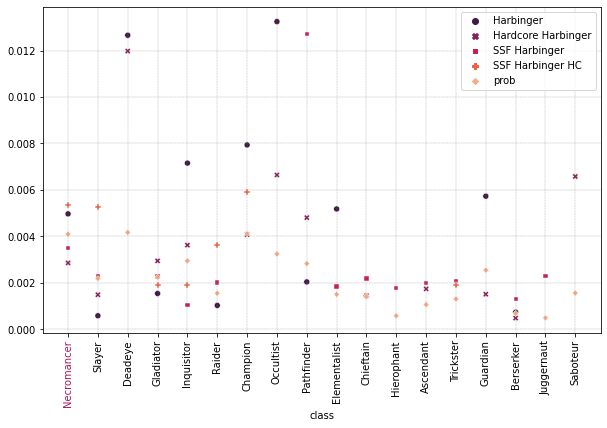

In [33]:
plt.figure(figsize=(10, 6))
plt.xlabel
plt.xticks(rotation = 90)
sns.scatterplot(data = top30cla.set_index(keys = 'class'), 
                palette = 'rocket', 
                legend = 'full')

# Necromancer is the first x value. Highlight it.
plt.gca().get_xticklabels()[0].set_color(sns.color_palette(palette = 'rocket')[2])
plt.grid(linestyle = '--', linewidth = 0.3, color = 'gray')
plt.show()

As you see, the probability is almost medium when it's Necromancer.  
But this point of view has a problem in that the sample size(each class' character counts) has a big difference.  
Even if we raise the volume of the total sample size as much as Necromancers', it might damage the precision of the meaning(rank, the top 30, or not).  

## 3-2. Before "care of stream"...
---
Getting probability methods with 'caring of twitch stream' is the same as above(3-1-1, 3-1-2).  
<br>
Before solving the problem, I would do several EDA related to Twitch streaming.  
<br>
##### Caution! : Someone has multiple characters(`id`), but I considered ‘one character = one player’. Because the important thing is a choice, not a player.


#### Dataset setting

In [34]:
# set dataframes of Necromancers who's twitch column is not null.
# Don't forget the condition list!
# cond_Nec = (df['class']=='Necromancer')
# cond_30 = (df['rank']<=30)
# cond_tw = (df['stream']==1)

df_Nec = df[cond_Nec]
df_NecTw = df[cond_Nec&cond_tw]
df_NecTw30 = df[cond_Nec&cond_tw&cond_30]

---
### 3-2-1. How rates much characters have Twitch IDs?
In this issue, I'm going to proceed with the analysis, thinking that "players Having a Twitch ID = streaming player" 

Before that, I was wondering how many characters have Twitch IDs.


In [36]:
tmp = pd.DataFrame(columns = ['all_rank', 'top_30', 'out_30'])

tmp['all_rank'] = [df['stream'].mean(), 
                   df[cond_Nec]['stream'].mean(), 
                   df[~cond_Nec]['stream'].mean()]

tmp['top_30'] = [df[cond_30]['stream'].mean(), 
                      df[cond_Nec&cond_30]['stream'].mean(),
                      df[~cond_Nec&cond_30]['stream'].mean()]

tmp['out_30'] = [df[~cond_30]['stream'].mean(), 
                      df[cond_Nec&~cond_30]['stream'].mean(),
                      df[~cond_Nec&~cond_30]['stream'].mean()]

tmp.index = ['all_class', 'Nec', 'except_Nec']
tmp.round(3)

,all_rank,top_30,out_30
all_class,0.273,0.625,0.272
Nec,0.283,0.690,0.281
except_Nec,0.271,0.604,0.271


Roughly speaking, the characters in the top 30 have a high rate of streaming.  
And it seems that the rate of streaming in Necromancer is a little higher than others' total rate of streaming.

### 3-2-2. Correlation with `stream` column

How much is streaming involved with the rank? We have to think about the relationship between the columns.  

- Before analyzing, I think we should be noted that streaming itself does not affect rank in substance.   
    Strictly speaking, there's no causal relationship between the two. Just because he's on the streaming doesn't mean he's doing better. In other words, some people just stream, and many people don't broadcast games and just play them.  

- Also, the fact that they have a Twitch ID and that the 'twitch' column is 'not `null`' only indicates that they entered the information, but it does not necessarily mean that they actually stream the game.   
    Therefore, to solve a problem with this data, we can only assume that 'having a twitch ID' means that they stream.

But! the questioner wanna know regarding 'streaming'.  
It is not expected to be related to the rank not that much, I will check it with the correlation coefficient.  

#### correlation values 

In [52]:
# We made a twitch column dummy with streaming.
# df['stream'] = np.where(df['twitch'].isna(), 0, 1)

# get the correlation 
a = df.corr(numeric_only = True)[['stream']].round(3)            # All classes
b = df_Nec.corr(numeric_only = True)[['stream']].round(3)        # Necromancer only
c = df[~cond_Nec].corr(numeric_only = True)[['stream']].round(3) # other classes

tmp = pd.concat([a, b, c], axis = 1)
tmp.columns = ['All', 'Nec', 'except_Nec']
tmp

,All,Nec,except_Nec
rank,-0.056,-0.074,-0.053
dead,0.035,0.041,0.034
online,-0.011,-0.023,-0.009
level,0.099,0.097,0.099
experience,0.113,0.119,0.113
challenges,0.186,0.208,0.184
stream,1.000,1.000,1.000


#### [graph 3-4] Correlation heatmap with stream(0, 1) column

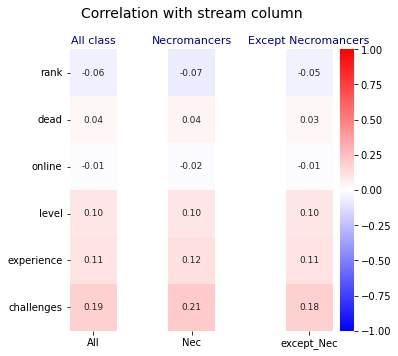

In [53]:
# dual subplots
fig, axes = plt.subplots(1, 3, figsize=(6, 5))

# [:-1] : `stream` index is excepted! 
# firts one
sns.heatmap(data=tmp[['All']][:-1], cmap='bwr', square=True, vmin=-1, vmax=1, ax=axes[0], 
            annot=True, annot_kws={"size": 9}, fmt=".2f", cbar=False, yticklabels=True)
axes[0].set_title('All class', fontsize=11, color='navy')

# second one
sns.heatmap(data=tmp[['Nec']][:-1], cmap='bwr', square=True, vmin=-1, vmax=1, ax=axes[1], 
            annot=True, annot_kws={"size": 9}, fmt=".2f", cbar=False, yticklabels=False)
axes[1].set_title('Necromancers', fontsize=11, color='navy')

# third one
sns.heatmap(data=tmp[['except_Nec']][:-1], cmap='bwr', square=True, vmin=-1, vmax=1, ax=axes[2], 
            annot=True, annot_kws={"size": 9}, fmt=".2f", cbar=True, yticklabels=False)
axes[2].set_title('Except Necromancers', fontsize=11, color='navy')

# layouts
plt.suptitle(t = 'Correlation with stream column', fontsize = 14)

plt.tight_layout()
plt.show()

It doesn't seem to have many relationships with `Stream`. (Honestly, the insight of this correlation analyzing is really important with the next step, `'3-3-1'`.) All characters’ is -0.056, and Necromancers’ is -0.074 with `rank`. They have a small negative correlation.

So I get the numbers for the Necromancers, just like the above methods.

### 3-2-3. Necromancers' rank distribution by stream
Let’s see their rank distribution, by ladders. I plotted a box plot first.  

#### [graph 3-5] Necromancers rank boxplot by each ladder with `stream` variation
It's in the same context with [graph 3-2]. But this is divided by `stream` column.

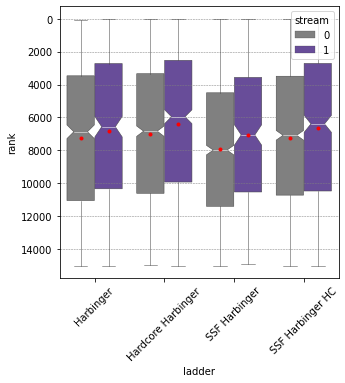

In [59]:
# Necromancers rank boxplot by ladder, with stream 
plt.figure(figsize=(5, 5))
plt.xticks(rotation = 45, fontsize = 10)

greypurple = dict({0:'grey', 1:'#6441a5'}) # stream 0, 1 colordictionary!

sns.boxplot(data = df_Nec.sort_values(by = 'ladder'), x = 'ladder', y = 'rank', 
            hue = 'stream', palette = greypurple, linewidth = 0.5,
            notch = True, medianprops = ({'color' : 'white'}), 
            showmeans = True, meanprops={'marker':'.', 'markerfacecolor':'red', 'markeredgecolor':'red'}).invert_yaxis()
plt.grid(linestyle = '--', linewidth = 0.5, color = 'gray', axis = 'y')
plt.show()

0 means not streaming players, and 1 means streaming players.  
It isn't large that much but there are slight differences between Twitch streaming players and non-streaming players.  

Follows are the exact figures:

#### Necromancers number, mean of rank, standard deviation of rank by ladder and stream

In [60]:
pd.pivot_table(data = df[(cond_Nec)], values = 'rank', index = 'ladder', columns = 'stream',
               aggfunc = ['count','mean', 'std']).round(2)

count          mean               std         
stream                 0    1        0        1        0        1
ladder                                                           
Harbinger            833  374  7220.38  6826.26  4371.08  4579.35
Hardcore Harbinger  1334  765  7024.24  6394.28  4262.05  4277.29
SSF Harbinger       1409  307  7911.71  7089.18  4243.68  4307.04
SSF Harbinger HC    1499  556  7227.97  6659.03  4301.46  4386.10

### 3-2-4. Exploring character distribution across various Pivot tables  
The italicized text indicates the overall population of **the table**.  

#### (1) Number of Necromancers in the *top 30* by stream and ladder

In [70]:
# Number of "Necromancers in the top 30" by ladder and stream
# "How many top 30 Necromancers are streaming?"
a = pd.pivot_table(data = df[(cond_Nec)&(cond_30)], values = 'id', 
               index = 'ladder', columns = 'stream', aggfunc = 'count', fill_value = 0)
a.columns = ['not_streaming_Nec', 'streaming_Nec']
b = df[(cond_Nec)&(cond_30)].groupby('ladder')[['id']].count()
b.columns = ['total_top30_Nec']
c = pd.concat([a, b], axis = 1)
c['streaming_ratio'] = round(c.iloc[:, 1] / c.iloc[:, 2], 2)
c

,not_streaming_Nec,streaming_Nec,total_top30_Nec,streaming_ratio
ladder,,,,
Harbinger,0,6,6,1.00
Hardcore Harbinger,1,5,6,0.83
SSF Harbinger,4,2,6,0.33
SSF Harbinger HC,4,7,11,0.64


There are no Necromancers who don't stream in the top 30. 

#### (2) Number of the top 30 characters which are *streaming Necromancers* by ladder

In [71]:
# All "streaming Necromancers" by ladder and rank
# "How many streaming Necromancers are in there?"
a = pd.pivot_table(data = df[(cond_Nec)&(cond_tw)], values = 'id', columns = cond_30,
              index = 'ladder', aggfunc = 'count')
b = pd.pivot_table(data = df[(cond_Nec)&(cond_tw)], values = 'id',
              index = 'ladder', aggfunc = 'count')

c = pd.concat([a,b], axis = 1)
c.columns = ['out30', 'top30', 'total']
c['top30_ratio'] = c['top30']/c['total']
c[['top30', 'out30', 'total', 'top30_ratio']] # in a different order

,top30,out30,total,top30_ratio
ladder,,,,
Harbinger,6,368,374,0.016043
Hardcore Harbinger,5,760,765,0.006536
SSF Harbinger,2,305,307,0.006515
SSF Harbinger HC,7,549,556,0.012590


#### (3) Number of *streaming characters* by class(Necromancer or not) and ladder

In [62]:
# All "Streaming characters" by ladder and class
# "How many streaming characters are Necromancers?"
a = pd.pivot_table(data = df[(cond_tw)], values = 'id', columns = cond_Nec,
              index = 'ladder', aggfunc = 'count')
b = pd.pivot_table(data = df[(cond_tw)], values = 'id',
              index = 'ladder', aggfunc = 'count')

c = pd.concat([a,b], axis = 1)
c.columns = ['others', 'Nec', 'total']
c['Nec_ratio'] = c['Nec']/c['total']
c[['Nec', 'others', 'total', 'Nec_ratio']]

,Nec,others,total,Nec_ratio
ladder,,,,
Harbinger,374,4090,4464,0.083781
Hardcore Harbinger,765,4687,5452,0.140315
SSF Harbinger,307,2354,2661,0.115370
SSF Harbinger HC,556,3167,3723,0.149342


#### [graph 3-7] Visualizing each classes characters in the top 30 by Twitch column
This help us compare the number by class, and twitch columns. (Necromancers are more than others. Maybe the questioner gave us the question about Necromancer 🤓)

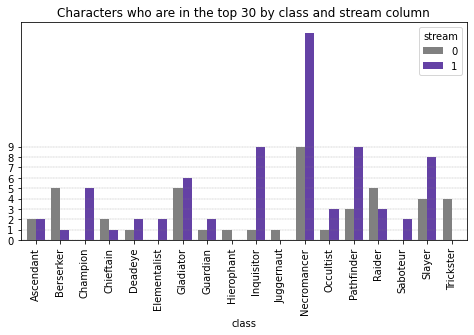

In [96]:
# characters in top 30 who has Twitch id by class
df_top30cl = df[cond_30].pivot_table(columns = 'stream', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id']
greytwitchpurple = ['grey', '#6441a5']

# plt.rcParams["figure.figsize"] = (8, 4)
# df_top30cl.reset_index().plot(kind = 'bar', x = 'class', color = ['grey', '#6441a5']) # you can write with `color = greypurple`
# plt.title('Characters who are in the top 30 by class and stream column')
# plt.grid(linestyle = '--', linewidth = 0.3, color = 'gray')
# plt.yticks(range(0, 21, 2))
# plt.show()

# plotting function
def plot_character_count(df, title, colors, ranges):
    plt.rcParams["figure.figsize"] = (8, 4)
    ax = df.plot(kind = 'bar', x = 'class', width = 0.75, color = colors)
    plt.grid(linestyle = '--', linewidth = 0.3, color = 'gray', axis = 'y')  # grid only y axis
    plt.yticks(ranges)  # y ticks set
    plt.title(title)
    plt.show()

plot_character_count(df_top30cl.reset_index(), 'Characters who are in the top 30 by class and stream column', greytwitchpurple, range(0, 10, 1))

#### [graph 3-8] Visualizing each classes characters in the top 30 by Twitch column and ladder
How many characters are in the top 30 by Twitch stream, class and ladder? We can compare them.  
(There is no class without an id in the top 30.)

트위치 스트리밍별, 래더별 30위 안에들은 캐릭터 수들을 클래스 별로 나타낸다.
트위치 스트리밍은 바 두 개로, 래더는 컬러로 누적을, 그리고 x축에 클래스를 적는다.

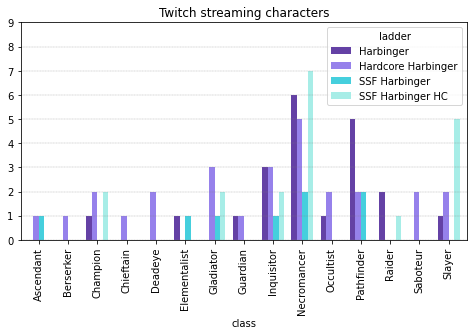

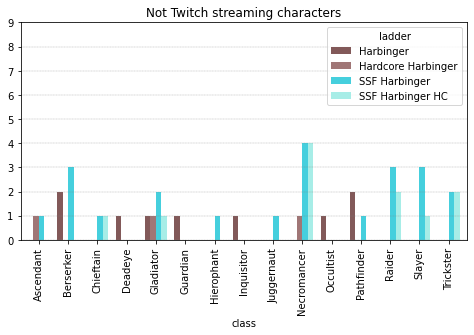

In [92]:
# character number in top 30 who has Twitch id by class
df_top30cl_tw = df[cond_30&cond_tw].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id']
# character number in top 30 who hasn't Twitch id by class
df_top30cl_ntw = df[cond_30&(~cond_tw)].pivot_table(columns = 'ladder', index = 'class',
                                aggfunc = 'count', fill_value = 0)['id']

# palette
purplemint = ['#6441a5', '#9681EB', '#45CFDD', '#A7EDE7']
brownmint = ['#825959', '#A07676', '#45CFDD', '#A7EDE7']

# plotting function
def plot_character_count(df, title, colors, ranges):
    ax = df.plot(kind = 'bar', x = 'class', width = 0.75, color = colors)
    plt.grid(linestyle = '--', linewidth = 0.3, color = 'gray', axis = 'y')  # grid only y axis
    plt.yticks(ranges)  # y ticks set
    plt.title(title)
    plt.show()

# Twitch streaming characters
plot_character_count(df_top30cl_tw.reset_index(), 'Twitch streaming characters', purplemint, range(0, 10, 1))

# Not Twitch streaming characters
plot_character_count(df_top30cl_ntw.reset_index(), 'Not Twitch streaming characters', brownmint, range(0, 10, 1))

## 3-3. Care of stream
---
I'll show Bayesian probability methods and machine learning probabilities in this chapter.

- Before them, I quickly show the probability by multiplying (`3-3-1`).  
- And the latter one(`3-3-2`) is similar to `3-1-2`. Please enjoy the Bayes logic that presented two variables in different codes and judge about the `3-1-2`.  
- And finally, I'll learn a simple model and predict the `proba` from it.

### 3-3-1. The Necromancer ratio of Among the top 30 * "Stream or not" ratio * probability when we are in the top 30

Let's multiply it by the ratio, as we usually do with empirical probability.  

In [17]:
# in top 30 classes ratio by using broadcasting
total30prob = df[cond_30].groupby(by = 'ladder')['id'].count() / df.groupby(by = 'ladder')['id'].count()
# print(total30prob, '\n')

# each ratio of twitch users
twratio = df[(cond_30)&(cond_Nec)&(cond_tw)].groupby(by = 'ladder')['id'].count()/30
# print(twratio, '\n')

# each ratio of not twitch users
ntwratio = df[(cond_30)&(cond_Nec)&(~cond_tw)].groupby(by = 'ladder')['id'].count()/30
# print(ntwratio)

#### (1) getting the probability by method 1

In [18]:
# multiplying and show
pd.set_option('display.float_format', None)
print("* Necromancers, twitch users in top30 ratio X top 30 probability")
print('(%)', total30prob*twratio*100)
print("* Necromancers, not twitch users in top30 ratio X top 30 probability")
print(total30prob*ntwratio*100)

* Necromancers, twitch users in top30 ratio X top 30 probability
(%) ladder
Harbinger             0.040220
Hardcore Harbinger    0.033546
SSF Harbinger         0.013350
SSF Harbinger HC      0.046754
Name: id, dtype: float64
* Necromancers, not twitch users in top30 ratio X top 30 probability
ladder
Harbinger                  NaN
Hardcore Harbinger    0.006709
SSF Harbinger         0.026700
SSF Harbinger HC      0.026717
Name: id, dtype: float64


In [19]:
# is there no Necromancers in the top 30 who are not streaming?! - Yes.
df[(cond_30)&(cond_Nec)&(df['ladder'] == 'Harbinger')]['stream'].mean()

1.0

#### [Answer] method 1 result: 
As we saw in (2) of Chapter 3-2 above, there are no Necromancers who didn't do twitch streaming in Harbinger Ladder.  
And the probability is almost higher when we stream to twitch, but in SSF Harbinger mode isn't.  

##### values get from twitch users
    ladder
    Harbinger             0.040220
    Hardcore Harbinger    0.033546
    SSF Harbinger         0.013350
    SSF Harbinger HC      0.046754
##### values get from not twitch users
    ladder
    Harbinger                  NaN
    Hardcore Harbinger    0.006709
    SSF Harbinger         0.026700
    SSF Harbinger HC      0.026717


### 3-3-2. Rate Among the Necromancers and the streamers (Bayesian probability)

Is there a relationship between `Class` and `Twitch` streaming? No. We checked it in `3-2-2`.  <br>
Even if there's a meaningful correlation value, at least, we must treat them as independent variables. Because there's no duty or coerciveness about __streaming or choosing a class.__  


#### (1) getting the probability by method 2 (same as 3-1-2)
The values are different depending on streaming or not. So I divided them the twitch users or not.  
As you know, each ladder doesn't have an exact number of 15000 IDs.  
There's two variables, so I showed the values with a frame, like this.  
The value's unit is the percentage.  

| ---|Top 30|Out 30|
|---|---|---|
|Stream|$v1$|$v2$|
|Not Stream|$v3$|$v4$|

In [20]:
# Don't forget condition list!
# cond_Nec = (df['class']=='Necromancer')
# cond_tw = (df['stream']==1)
# cond_30 = (df['rank']<=30)

# ladders = list(df['ladder'].unique()) # ladder list for iterating
# ladders.sort()


prob_TNS_byladder = []
prob_TNs_byladder = []

for i in ladders:
    
    # prior probability
    cond_ladder = (df['ladder']==i)
    ladderlen = len(df[(df['ladder']==i)])
    TOP = 30 / ladderlen
    OUT = (ladderlen - 30) / ladderlen
    
    # the condition about 'Necromancer'
    # for convenience, 'Not Necromancer' condition is presented with a lower n.
    p_NT = df[cond_Nec&cond_30&cond_ladder]['id'].count() / 30
    p_nT = df[~cond_Nec&cond_30&cond_ladder]['id'].count() / 30

    p_NO = df[cond_Nec&~cond_30&cond_ladder]['id'].count() / (ladderlen-30)
    p_nO = df[~cond_Nec&~cond_30&cond_ladder]['id'].count() / (ladderlen-30)

    # the condition about 'Stream'
    # for convenience, 'Not Streaming' condition is presented with a lower s.
    p_ST = df[cond_tw&cond_30&cond_ladder]['id'].count() / 30
    p_sT = df[~cond_tw&cond_30&cond_ladder]['id'].count() / 30

    p_SO = df[cond_tw&~cond_30&cond_ladder]['id'].count() / (ladderlen-30)
    p_sO = df[~cond_tw&~cond_30&cond_ladder]['id'].count() / (ladderlen-30)

    # Top 30 when 'Necromancer' and 'Streaming', and these's sum will be the 'whole space'.
    NS_TOP = p_NT*p_ST*TOP
    NS_OUT = p_NO*p_SO*OUT
    # Make a probability 
    prob_top = NS_TOP/(NS_TOP+NS_OUT)
    prob_out = NS_OUT/(NS_TOP+NS_OUT)
    prob_TNS_byladder.append([prob_top, prob_out])
    
    # Top 30. when 'Necromancer' and Not 'Streaming'
    Ns_TOP = p_NT*p_sT*TOP
    Ns_OUT = p_NO*p_sO*OUT
    # Make a probability 
    prob_top = Ns_TOP/(Ns_TOP+Ns_OUT)
    prob_out = Ns_OUT/(Ns_TOP+Ns_OUT)
    prob_TNs_byladder.append([prob_top, prob_out])

df_prob_TNS_byladder = pd.DataFrame(data = prob_TNS_byladder, index = ladders, columns = ['Top30', 'Out30'])
df_prob_TNs_byladder = pd.DataFrame(data = prob_TNs_byladder, index = ladders, columns = ['Top30', 'Out30'])

df_probs_bayesian = pd.concat([df_prob_TNS_byladder, df_prob_TNs_byladder], axis = 0, 
                              keys = ['Streaming', 'Not Streaming'])
df_probs_bayesian*100

# if you want to see only Top 30 probability
# df_probs_bayesian[['Top30']]*100

NameError: name 'ladders' is not defined

#### (2) [Answer] method 2 result:
If we stream the play of the game when we are Necromancer, the probability is rise.  
Can you believe that? _(Of course, I don't 'believe'. I'm not such an excellent player :0 haha.)_
```
Streaming      Harbinger             1.158262
               Hardcore Harbinger    0.702458
               SSF Harbinger         0.524533
               SSF Harbinger HC      1.356286
Not Streaming  Harbinger             0.213172
               Hardcore Harbinger    0.045104
               SSF Harbinger         0.311843
               SSF Harbinger HC      0.261677
```


### 3-3-3. Get probability with machine learning algorithm

When we conduct a classification with machine learning algorithms, we can find the probability that each data point has a classified value of 1 or 0. But it would be good to just move on after noticing that there is a way to do this that I thought. Because there's not enough data to use, and there's a lot of class imbalance.  

In [ ]:
# 러신머닝